In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import fasttext
import fasttext_models as fm

In [3]:
print("First thing's first, we need to make our models.\nWe will be building 10 models in total: 5 will be trained on cleaned and lemmatized data, 5 will be trained on the raw text. Each of the 5 for those two training sets will vary by vector length: 25, 50, 100, 200, and 300.")
# execfile('fasttext_models.py') - Does not work in python 3, use:
#exec(open("./fasttext_models.py").read())

mcs,mus = ([mc0,mc1,mc2,mc3,mc4],[mu0,mu1,mu2,mu3,mu4]) = fm.main()

First thing's first, we need to make our models.
We will be building 10 models in total: 5 will be trained on cleaned and lemmatized data, 5 will be trained on the raw text. Each of the 5 for those two training sets will vary by vector length: 25, 50, 100, 200, and 300.
reviews_train.json loaded:
   Id  HelpfulnessNumerator  HelpfulnessDenominator  Score  \
0   1                     1                       1      5   
1   2                     0                       0      1   
2   3                     1                       1      4   
3   4                     3                       3      2   
4   5                     0                       0      5   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cou

In [4]:
# load the models for evaluation
'''
mc0 = fasttext.load_model('data/fasttext_skipgram_cleaned_D25.bin')
mc1 = fasttext.load_model('data/fasttext_skipgram_cleaned_D50.bin')
mc2 = fasttext.load_model('data/fasttext_skipgram_cleaned_D100.bin')
mc3 = fasttext.load_model('data/fasttext_skipgram_cleaned_D200.bin')
mc4 = fasttext.load_model('data/fasttext_skipgram_cleaned_D300.bin')
mcs = [mc0,mc1,mc2,mc3,mc4]

mu0 = fasttext.load_model('data/fasttext_skipgram_uncleaned_D25.bin')
mu1 = fasttext.load_model('data/fasttext_skipgram_uncleaned_D50.bin')
mu2 = fasttext.load_model('data/fasttext_skipgram_uncleaned_D100.bin')
mu3 = fasttext.load_model('data/fasttext_skipgram_uncleaned_D200.bin')
mu4 = fasttext.load_model('data/fasttext_skipgram_uncleaned_D300.bin')
mus = [mu0,mu1,mu2,mu3,mu4]
'''

print("\nHere are the top 50 words for the model trained on cleaned data with D100:")
mc2_words = mc4.get_words()
print(mc2_words[:50])
print("\nHere are the top 50 words for the model trained on uncleaned data with D100:")
mu2_words = mu2.get_words()
print(mu2_words[:50])

print("Nota Bene: I cannot figure out how to remove some of these symbols. I am pretty sure the strategy I used in fasttext_models.py works, but it is still not working out. My theory is that some of these are subwords... but I doubt that it is that simple.")


Here are the top 50 words for the model trained on cleaned data with D100:
['>', '<', 'br', '</s>', 'like', 'good', 'taste', 'flavor', 'one', 'get', 'love', 'product', 'make', 'use', 'coffee', 'great', 'try', 'well', 'food', 'buy', 'tea', 'find', 'would', 'eat', 'dog', 'go', 'really', 'time', 'much', 'amazon', 'order', 'also', 'price', 'bag', 'cup', 'give', 'little', 'even', 'drink', 'say', 'think', 'store', 'day', 'cat', 'add', 'box', 'chocolate', 'treat', 'come', 'first']

Here are the top 50 words for the model trained on uncleaned data with D100:
['the', 'I', 'and', 'a', 'to', 'of', 'is', 'it', '</s>', 'for', 'in', 'this', 'that', 'my', 'with', 'have', 'but', 'are', 'was', 'not', 'you', '/><br', 'on', 'as', 'like', 'they', 'so', 'be', 'The', 'or', 'at', 'these', 'just', 'them', 'very', 'from', 'one', 'good', 'It', '"I', 'has', 'can', 'taste', 'will', 'would', 'had', 'all', 'more', 'than', 'when']
Nota Bene: I cannot figure out how to remove some of these symbols. I am pretty sure 

In [23]:
import get_accuracy

print("Now let's compare our 10 different models' accuracy, precision, and recall.")
print("First, a quick note about precision and recall: The fasttext test() function calculates  precision and recall \"at k\" for our models. Note that these are not the usual definitions of precision and recall used in most discussion about binary classifiers. More precisely, precision at k is:\n      P@k = r / k,\n      the # of relevant labels r divided by the number of top predictions k.")
print("In our case, P@1 will be either 1 or 0 in each test case, because the top guess either is or is not the correct label.\nFor our purposes, just considering precision and recall at 1 makes sense, because there is only one label we care about: the correct one. When k>1, our models can only get a value of either 1/k or 0 in each test case, making this a poor measure of accuracy.\nIt is not explicitly stated in the fasttext documentation, but it is reasonable to assume that P@1 will give the same output as we would get using the sci kit library's tools.\nSpecifically, it gives the same results as sklearn.metrics.precision_score(average='micro') would. This means that fasttext.test() is calculating metrics globally by counting the total true positives, false negatives and false positives across all the labels and producing one number for the precision and recall score. Unfortunately, there seems to be no way to change this calculation beyond varying the k value.")
print("To calculate accuracy for comparision with our other models (with different embeddings), we need to use our own code. See the module get_accuracy.py for more informaiton.\n\n\tThe following dataframe compares our models' preformance on test data:")

cdata = []
for m in mcs :
    data = []
    # clean
    n,p,r = m.test('data/reviews_uncleaned.test', k=1)

    data.append('Clean')
    data.append(m.get_dimension())
    data.append(get_accuracy.get_accuracy(m)[0])
    data.append(p)
    data.append(r)
    data.append(n)
    cdata.append(data)
#                                   'Clean', d, get_accuracy, p, r, n
df1 = pd.DataFrame(cdata,columns = ['Train Data','Word Vector Size','Accuracy','Precision @1','Recall @1','N'])

udata = []
for m in mus :
    data = []
    n,p,r = m.test('data/reviews_uncleaned.test', k=1)

    data.append('Unclean')
    data.append(m.get_dimension())
    data.append(get_accuracy.get_accuracy(m)[0])
    data.append(p)
    data.append(r)
    data.append(n)
    udata.append(data)
df2 = pd.DataFrame(udata,columns = ['Train Data','Word Vector Size','Accuracy','Precision @1','Recall @1','N'])

df_merged=pd.concat([df1,df2], ignore_index=True)
df_merged

Now let's compare our 10 different models' accuracy, precision, and recall.
First, a quick note about precision and recall: The fasttext test() function calculates  precision and recall "at k" for our models. Note that these are not the usual definitions of precision and recall used in most discussion about binary classifiers. More precisely, precision at k is:
      P@k = r / k,
      the # of relevant labels r divided by the number of top predictions k.
In our case, P@1 will be either 1 or 0 in each test case, because the top guess either is or is not the correct label.
For our purposes, just considering precision and recall at 1 makes sense, because there is only one label we care about: the correct one. When k>1, our models can only get a value of either 1/k or 0 in each test case, making this a poor measure of accuracy.
It is not explicitly stated in the fasttext documentation, but it is reasonable to assume that P@1 will give the same output as we would get using the sci kit libr

,Train Data,Word Vector Size,Accuracy,Precision @1,Recall @1,N
0,Clean,25,0.590592,0.590592,0.590592,113691
1,Clean,50,0.591516,0.591516,0.591516,113691
2,Clean,100,0.591472,0.591472,0.591472,113691
3,Clean,200,0.589800,0.589800,0.589800,113691
4,Clean,300,0.587857,0.587857,0.587857,113691
5,Unclean,25,0.686915,0.686915,0.686915,113691
6,Unclean,50,0.686615,0.686615,0.686615,113691
7,Unclean,100,0.686932,0.686932,0.686932,113691
8,Unclean,200,0.686360,0.686360,0.686360,113691
9,Unclean,300,0.686422,0.686422,0.686422,113691


In [63]:
# Prepare the epochs followup analysis to

ms = [mc0,mc1,mc2,mc3,mc4,mc5,mc6,mc7,mc8,mc9,mc10,mc11,mc12,mc13,mc14] = fm.main('epochs')

reviews_train.json loaded:
   Id  HelpfulnessNumerator  HelpfulnessDenominator  Score  \
0   1                     1                       1      5   
1   2                     0                       0      1   
2   3                     1                       1      4   
3   4                     3                       3      2   
4   5                     0                       0      5   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

                                               clean  
0  buy several vitality can dog food product find...  
1  product arri

In [24]:
# Let's get some more stats about our models. We will use scikit-learn to get some statistics for comparing our models.
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error
# get_accuracy.get_guesses(m, labels, reviews) can give us the information we need for our analysis
# get_accuracy.get_guesses() : A function that will return the a 3tuple (listof guesses, listof test labels, listof reviews), all matching index

In [68]:
# Now let's get the RMSE and accuracy for each of our ten models:
# That means getting the list of predictions for each model, then using scikit to measure RMSE and accuracy, and finally adding it to df_merged

# First, we need to get the string list of labels and reviews for the testing dataset
# To do this, run ev.get_accuracy() on an arbitrary model.
a, str_labels, reviews = get_accuracy.get_accuracy(mc2)

str_guesses = [] # will be a listof listof Ints for dimensions analysis
str_guesses2 = [] # will be a listof listof Ints for epochs analysis

for m in mcs :
    g, l, r = get_accuracy.get_guesses(m, str_labels, reviews)
    str_guesses.append(g)
    
for m in mus :
    g, l, r = get_accuracy.get_guesses(m, str_labels, reviews)
    str_guesses.append(g)

for m in ms :
    g, l, r = get_accuracy.get_guesses(m, str_labels, reviews)
    str_guesses2.append(g)


l__3', '__label__4', '__label__5', '__label__5', '__label__3', '__label__5', '__label__5', '__label__5', '__label__5', '__label__5', '__label__4', '__label__5', '__label__5', '__label__5', '__label__4', '__label__5', '__label__5', '__label__5', '__label__5', '__label__5', '__label__5', '__label__5', '__label__5', '__label__4', '__label__4', '__label__5', '__label__5', '__label__5', '__label__5', '__label__5', '__label__5', '__label__5', '__label__5', '__label__5', '__label__5', '__label__5', '__label__5', '__label__5', '__label__5', '__label__4', '__label__5', '__label__5', '__label__3', '__label__5', '__label__4', '__label__5', '__label__5', '__label__5', '__label__2', '__label__5', '__label__5', '__label__5', '__label__5', '__label__5', '__label__5', '__label__5', '__label__4', '__label__2', '__label__4', '__label__5', '__label__5', '__label__4', '__label__4', '__label__5', '__label__5', '__label__5', '__label__5', '__label__5', '__label__5', '__label__5', '__label__5', '__label__4',

In [71]:
print(len(str_guesses2))

15


In [74]:
# guesses correspond as such: guesses[0] --> mc0, guesses[1] --> mc1, ... guesses[9] --> mu4
# make all of the guesses and labels into ints (necessary for RMSE):
convert = {
    '__label__1' : 1,
    '__label__2' : 2,
    '__label__3' : 3,
    '__label__4' : 4,
    '__label__5' : 5,
}

guesses = []

for inner in str_guesses :
    temp = []
    for j in inner :
        temp.append(convert[j])
    guesses.append(temp)
    
labels = []

for l in str_labels :
    labels.append(convert[l])

guesses2 = []

for inner in str_guesses2 :
    temp = []
    for j in inner :
        temp.append(convert[j])
    guesses2.append(temp)

In [76]:
# calculate RMSEs
RMSEs = []
As= []

i = 0
for m in mcs :
    r = mean_squared_error(labels, guesses[i], squared=False)
    a = accuracy_score(labels, guesses[i])
    RMSEs.append(r)
    As.append(a)
    i += 1

for m in mus :
    r = mean_squared_error(labels, guesses[i], squared=False)
    a = accuracy_score(labels, guesses[i])
    RMSEs.append(r)
    As.append(a)
    i += 1


RMSE2 = []
A2 = []

i = 0
for m in ms :
    r = mean_squared_error(labels, guesses2[i], squared=False)
    a = accuracy_score(labels, guesses2[i])
    RMSE2.append(r)
    A2.append(a)
    i += 1

print(A2)
print(RMSE2)

[0.6195653129975108, 0.6074799236527078, 0.5961685621553158, 0.590636022200526, 0.5909878530402582, 0.5890439876507375, 0.5941543305978485, 0.5887097483529918, 0.5887361356659718, 0.5923336060022342, 0.5903369659867536, 0.589026396108751, 0.5863172986428126, 0.5932571619565313, 0.5932395704145447]
[1.3257473903298704, 1.3188193780754833, 1.3158247396239398, 1.3135901835743444, 1.3152162997338601, 1.317998783126544, 1.3186693074052742, 1.3155573281795605, 1.316065363467152, 1.3174681266486545, 1.3189127467634911, 1.317952067235051, 1.3170641504668348, 1.3187893653076161, 1.3175348876424418]


In [28]:

# Now simply merge the RMSE data with the df_merged dataframe and we're done!
df_merged['RMSE'] = RMSEs
df_merged
for c in df_merged.columns :
    print(df_merged[c])

# We actually already have accuracy, I just wanted to have the scikit stuff for comparison


0      Clean
1      Clean
2      Clean
3      Clean
4      Clean
5    Unclean
6    Unclean
7    Unclean
8    Unclean
9    Unclean
Name: Train Data, dtype: object
0     25
1     50
2    100
3    200
4    300
5     25
6     50
7    100
8    200
9    300
Name: Word Vector Size, dtype: int64
0    0.590592
1    0.591516
2    0.591472
3    0.589800
4    0.587857
5    0.686915
6    0.686615
7    0.686932
8    0.686360
9    0.686422
Name: Accuracy, dtype: float64
0    0.590592
1    0.591516
2    0.591472
3    0.589800
4    0.587857
5    0.686915
6    0.686615
7    0.686932
8    0.686360
9    0.686422
Name: Precision @1, dtype: float64
0    0.590592
1    0.591516
2    0.591472
3    0.589800
4    0.587857
5    0.686915
6    0.686615
7    0.686932
8    0.686360
9    0.686422
Name: Recall @1, dtype: float64
0    113691
1    113691
2    113691
3    113691
4    113691
5    113691
6    113691
7    113691
8    113691
9    113691
Name: N, dtype: int64
0    1.314661
1    1.318466
2    1.318533
3    1.31

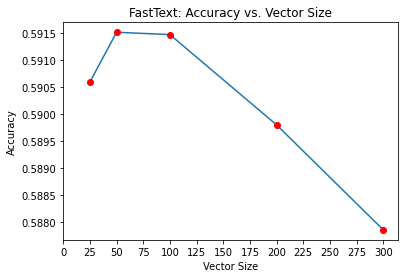

In [95]:
clean = df_merged[df_merged['Train Data'] == 'Clean']
Xs = [25,50,100,200,300]
Ys = clean['Accuracy']
plt.plot(Xs, Ys)
plt.plot(Xs, Ys, 'ro')
plt.xticks(range(0,301,25))
plt.title('FastText: Accuracy vs. Vector Size')
plt.xlabel('Vector Size')
plt.ylabel('Accuracy')

plt.savefig('ft size v accuracy.png')

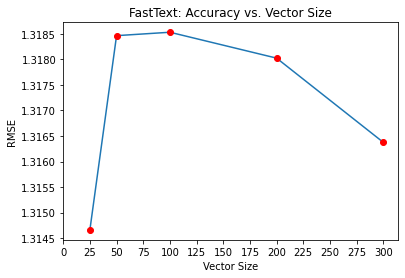

In [96]:
Xs = [25,50,100,200,300]
Ys = clean['RMSE']
plt.plot(Xs, Ys)
plt.plot(Xs, Ys, 'ro')
plt.xticks(range(0,301,25))
plt.title('FastText: RMSE vs. Vector Size')
plt.xlabel('Vector Size')
plt.ylabel('RMSE')

plt.savefig('ft size v RMSE.png')


In [97]:
Xs = [25,50,100,200,300]
acc = list(clean['Accuracy'])
rmse = list(clean['RMSE'])
print(Xs,acc,rmse)
'''
fasttezt dimensions followup
ds = [25, 50, 100, 200, 300]
acc = [0.5905920433455595, 0.5915155992998566, 0.5914716204448901, 0.5898004239561618, 0.5878565585666412]]
rmse = [1.3146611035170768, 1.3184658510033977, 1.3185325614796095, 1.3180254771782667, 1.3163761041663984]
'''

[25, 50, 100, 200, 300] [0.5905920433455595, 0.5915155992998566, 0.5914716204448901, 0.5898004239561618, 0.5878565585666412] [1.3146611035170768, 1.3184658510033977, 1.3185325614796095, 1.3180254771782667, 1.3163761041663984]


'\nfasttezt dimensions followup\nds = [25, 50, 100, 200, 300]\nacc = [0.5905920433455595, 0.5915155992998566, 0.5914716204448901, 0.5898004239561618, 0.5878565585666412]]\nrmse = [1.3146611035170768, 1.3184658510033977, 1.3185325614796095, 1.3180254771782667, 1.3163761041663984]\n'

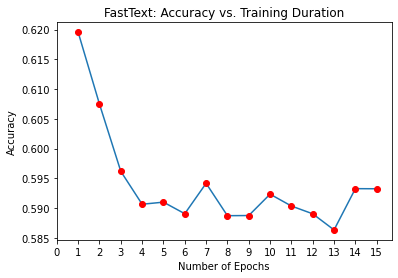

In [98]:
epochs = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# recall, guesses2 has our 15 models' outputs, A2 and RMSE2 have the metrics

Xs = epochs
Ys = A2

plt.plot(Xs, Ys)
plt.plot(Xs, Ys, 'ro')
plt.xticks(range(0,16))
plt.title('FastText: Accuracy vs. Training Duration')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')

plt.savefig('ft training v accuracy.png')


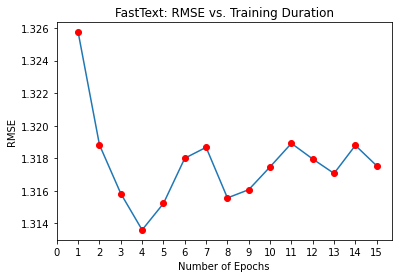

In [99]:
epochs = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# recall, guesses2 has our 15 models' outputs, A2 and RMSE2 have the metrics

Xs = epochs
Ys = RMSE2

plt.plot(Xs, Ys)
plt.plot(Xs, Ys, 'ro')
plt.xticks(range(0,16))
plt.title('FastText: RMSE vs. Training Duration')
plt.xlabel('Number of Epochs')
plt.ylabel('RMSE')

plt.savefig('ft training v RMSE.png')


In [100]:
print("Now let's take a look at some of the vector embeddings.")
print("Let's look at the vector for \"chocolate\" in the cleaned-data model:\n")
print(mc2.get_word_vector('chocolate'))
print("\nWe can also look at the most similar words, or the vector's 'neighbors.' These are determined by the cosine similarity of vectors.")
print(mc2.get_nearest_neighbors('chocolate'))

print("\nFasttext also lets us try out analogies. Let's see how it does with the following:")
print("\n\"\'hot\' is to \'cold\', what \'good\' is to _____\"")
print(mc2.get_analogies('hot','cold','good'))

Now let's take a look at some of the vector embeddings.
Let's look at the vector for "chocolate" in the cleaned-data model:

[ 0.0565689   0.15743615 -0.00348236  0.10263193 -0.22743365  0.01500341
  0.08898178  0.11162858  0.00791899 -0.0280816  -0.09640117 -0.00564728
 -0.03403551  0.04447785  0.04994579 -0.03850231 -0.15760532 -0.06542347
 -0.00688569 -0.02622033  0.16198687  0.20794006  0.05897457  0.04948661
 -0.03854034 -0.09108669 -0.07852932 -0.07466582  0.02273056  0.07635313
 -0.00524527  0.02064552  0.05240849 -0.02265868  0.0792501  -0.09759558
 -0.06865176 -0.02092584  0.0256157  -0.07845424  0.04329211 -0.0409249
 -0.05829973 -0.01896683  0.02627608  0.16852234 -0.07886993  0.04006672
  0.05362423 -0.19004938  0.08429457  0.04091556  0.07926143 -0.00850385
 -0.10357765  0.00221808  0.13821188  0.06337646  0.1560642   0.02681148
  0.08287015  0.07769789  0.10470113  0.00414746 -0.01797688  0.07663713
  0.07677617  0.06705093  0.02335281 -0.04606145 -0.02354395 -0.01462462
